## part I
- Poisson distribution with $\lambda$ = 2
    P(x=0, $\lambda$=2)

In [1]:
import math
2**0*math.e**(-2)/math.factorial(0)

0.1353352832366127

- Binomial distribution

In [2]:
math.factorial(20)/(math.factorial(2)*math.factorial(18))*0.1**2*0.9**18

0.2851798070642985

- Exponential distrition

In [3]:
math.e**(-3.0/2)

0.22313016014842985

- Normal distribution with mean = 120, sd = 5

In [4]:
import scipy.stats

In [5]:
scipy.stats.norm.sf(127, loc = 120, scale = 5)

0.080756659233771066

- Geometric distribution

In [6]:
p = 0
for i in xrange(1000):
    p+=(1-0.08)**(i)*0.08*(i+1)
p

12.500000000000012

In [7]:
1/0.08

12.5

- Uniform distrition

In [8]:
5.0/20

0.25

## Part 2: Covariance and Joint Distribution

In [9]:
import pandas as pd
df = pd.read_csv('data/admissions.csv')

IOError: File data/admissions.csv does not exist

#### Covariance

In [ ]:
df.cov()

In [ ]:
mean_fam_income = df['family_income'].mean()
mean_gpa = df['gpa'].mean()
mean_parent = df['parent_avg_age'].mean()

In [10]:
cov_fam_gpa = sum((df.family_income - mean_fam_income)*(df.gpa - mean_gpa)) / (1.*(len(df.gpa)-1))
cov_par_gpa = sum((df.parent_avg_age - mean_parent)*(df.gpa - mean_gpa)) / (1.*(len(df.gpa)-1))
cov_fam_par = sum((df.family_income - mean_fam_income)*(df.parent_avg_age - mean_parent)) / (1.*(len(df.gpa)-1))

NameError: name 'df' is not defined

In [11]:
print cov_fam_gpa, cov_par_gpa, cov_fam_par

NameError: name 'cov_fam_gpa' is not defined

#### Correlation

In [12]:
df.corr()

NameError: name 'df' is not defined

In [13]:
corr_fam_gpa = cov_fam_gpa / (df.family_income.std()*df.gpa.std())
corr_par_gpa = cov_par_gpa / (df.parent_avg_age.std()*df.gpa.std())
corr_fam_par = cov_fam_par / (df.family_income.std()*df.parent_avg_age.std())

NameError: name 'cov_fam_gpa' is not defined

In [16]:
print corr_fam_gpa, corr_par_gpa, corr_fam_par

0.742269390204 -0.00913485396451 -0.0063230482719


In [17]:
import matplotlib.pyplot as plt
%matplotlib inline

In [18]:
income_low = df[df.family_income <= 26832]
income_med = df[(df.family_income > 26832) & (df.family_income <= 37510)]
income_high = df[df.family_income > 37511]

In [19]:
from scipy.stats.kde import gaussian_kde

In [20]:
my_pdf_low = gaussian_kde(income_low.gpa)
my_pdf_med = gaussian_kde(income_med.gpa)
my_pdf_high = gaussian_kde(income_high.gpa)

In [21]:
import numpy as np

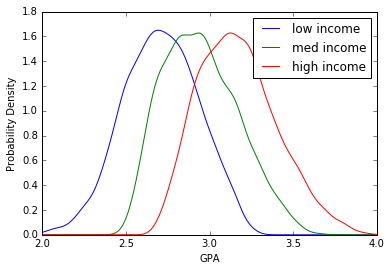

In [22]:
x = np.linspace(2.,4.,1000)

plt.plot(x, my_pdf_low(x), label='low income')
plt.plot(x, my_pdf_med(x), label='med income')
plt.plot(x, my_pdf_high(x), label='high income')
plt.legend()
plt.xlabel('GPA')
plt.ylabel('Probability Density')
plt.show()

Percentile cutoffs

In [23]:
low_90p_cutoff = np.percentile(income_low.gpa, 90)
med_90p_cutoff = np.percentile(income_med.gpa, 90)
high_90p_cutoff = np.percentile(income_high.gpa, 90)

In [24]:
print low_90p_cutoff, med_90p_cutoff, high_90p_cutoff

3.01 3.26 3.49


## Part 3: Pearson vs Spearman

In [25]:
df_hours = pd.read_csv('data/admissions_with_study_hrs_and_sports.csv')

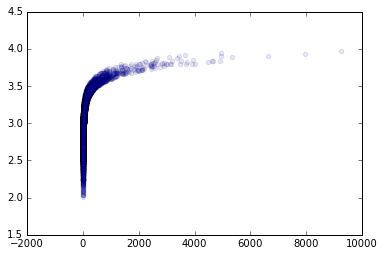

In [26]:
plt.scatter(df_hours['hrs_studied'], df_hours['gpa'], alpha = 0.1)

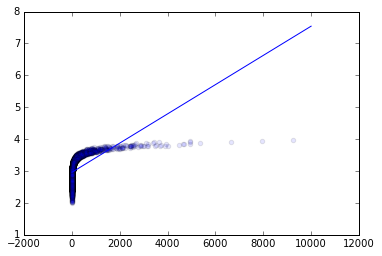

In [27]:
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(df_hours.hrs_studied, df_hours.gpa)
hrs = np.linspace(0, 10000, 10000)
gpa_predict = hrs * slope + intercept
plt.scatter(df_hours['hrs_studied'], df_hours['gpa'], alpha = 0.1)
plt.plot(hrs, gpa_predict)

In [28]:
p_coeff, p_value = scipy.stats.pearsonr(df_hours.hrs_studied, df_hours.gpa)
p_coeff

0.47594026466221012

In [29]:
r_coeff, p_value = scipy.stats.spearmanr(df_hours.hrs_studied, df_hours.gpa)
r_coeff

0.98495916559333341

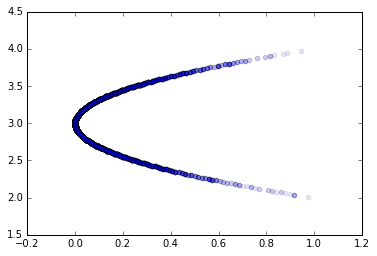

In [30]:
plt.scatter(df_hours['sport_performance'], df_hours['gpa'], alpha = 0.1)

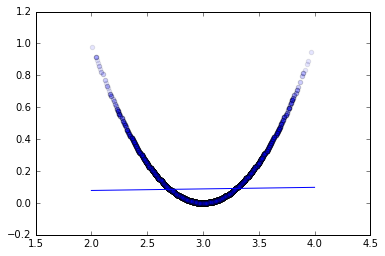

In [31]:
slope, intercept, r_value, p_value, std_err = \
scipy.stats.linregress(df_hours.gpa, df_hours.sport_performance)
gpa = np.linspace(2, 4, 10000)
sports_predict = gpa * slope + intercept
plt.scatter(df_hours.gpa, df_hours.sport_performance, alpha = 0.1)
plt.plot(gpa, sports_predict)

In [32]:
p_coeff, p_value = scipy.stats.pearsonr(df_hours.gpa, df_hours.sport_performance)
p_coeff

0.023848596954762224

In [33]:
r_coeff, p_value = scipy.stats.spearmanr(df_hours.gpa, df_hours.sport_performance)
r_coeff

0.0022881402736224248

## Part 4: Distribution Sim

In [14]:
import numpy as np
num_views = np.random.randint(1000, size = 1) +5000
conversion = np.random.choice([0,1], 1, p=[0.88, 0.12])
profit_p_sale = np.random.choice([50,60], 1, p=[.2, .8])

In [16]:
# profit = []
# for _ in range(100):
#     p =0
#     for i in xrange(np.random.randint(1000, size = 1) +5000):
#         p+= np.random.choice([0,1], 1, p=[0.88, 0.12])[0] * \
#          np.random.choice([50,60], 1, p=[.2, .8])[0]
#     profit.append(p)
# profit

profit = []
for _ in range(1000):
    n = np.random.randint(1000, size = 1) +5000
    p = (np.random.choice([0,1], n, p=[0.88, 0.12]) * \
        np.random.choice([50,60], n, p=[.2, .8])).sum()
    profit.append(p)
profit

[41170,
 37050,
 42760,
 36960,
 41790,
 37170,
 36940,
 35210,
 36900,
 35310,
 35700,
 38880,
 38810,
 36820,
 33590,
 38840,
 41790,
 34840,
 37860,
 37170,
 41020,
 42820,
 38240,
 39760,
 34680,
 36160,
 39710,
 33870,
 34560,
 40380,
 41790,
 35040,
 37750,
 36820,
 36920,
 37630,
 40340,
 37070,
 35580,
 38690,
 38700,
 39320,
 35560,
 37920,
 39700,
 38610,
 39260,
 37510,
 41360,
 37370,
 39090,
 44300,
 38320,
 41790,
 37600,
 39710,
 42770,
 38040,
 41040,
 37540,
 43300,
 37390,
 39700,
 34110,
 38200,
 36370,
 41290,
 40740,
 41560,
 37620,
 39290,
 41060,
 37850,
 38250,
 39390,
 38790,
 40780,
 38030,
 32250,
 37230,
 41930,
 37210,
 39900,
 36030,
 36250,
 36200,
 41240,
 35810,
 39070,
 41320,
 37600,
 42220,
 34520,
 34740,
 37540,
 34670,
 42930,
 42120,
 40310,
 38490,
 38150,
 33170,
 42570,
 36410,
 39350,
 41810,
 37180,
 40200,
 38030,
 37270,
 35220,
 36580,
 38200,
 36670,
 39440,
 41480,
 40040,
 41210,
 41720,
 37620,
 39350,
 34330,
 35370,
 35960,
 37880,


In [17]:
np.random.choice([0,1],n, p=[0.88, .12])


#plt.hist(pd.Series(profit))

array([0, 1, 0, ..., 0, 0, 0])

In [18]:
profit_sd = pd.Series(profit).std()
profit_mean = pd.Series(profit).mean()
CI95_tup = ((profit_mean-(2*profit_sd)), (profit_mean + (2*profit_sd)))
CI95_tup

(33322.793554146614, 43158.50644585339)

In [38]:
5500*0.12*58

38280.0

In [ ]:
pro